# Convolutional Neural Networsk Project

## Sub-project 1:

## Solve Fashion_MNIST with LeNet architecture

In this project you will implement the LeNet architecture of Convolutional Neural Networks. First you will download the Fashion-MNIST dataset. Split into train/validation/test datasets and train the network. Finally, plot the learning curves (train/validation loss and accuracy) and show the confusion matrix.

### 1. Download Fashion-MNIST

In [23]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim
import tensorflow as tf

import keras
from tensorflow.keras.optimizers import Adam

print(Adam)
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>


### 2. Split the data into train / validation / test subsets. Make mini-batches, if necesssary.

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# Enter data as mnist data set
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# normalizing
x_train = x_train / 255
x_test = x_test / 255
 
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)



In [25]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [26]:
# Test if the shapes are correct and the values make sense
print("x_train shape: " + str(x_train.shape))
print("y_train shape: " + str(y_train.shape))
print("x_val shape: " + str(x_val.shape))
print("y_val shape: " + str(y_val.shape))
print("x_test shape: " + str(x_test.shape))
print("y_test shape: " + str(y_test.shape))

x_train shape: (54000, 28, 28, 1)
y_train shape: (54000, 10)
x_val shape: (6000, 28, 28, 1)
y_val shape: (6000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


### 3. Build the LeNet model

In [27]:
# The LeNet model is build in Keras

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### 4. Train the model on the dataset

In [28]:
# Trine uses optimizer=keras.optimizers.Adam() on colab 
# model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.compile(loss=keras.metrics.categorical_crossentropy, optimizer="Adam", metrics=['accuracy'])

# Fitting the model

history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val))
score = model.evaluate(x_test, y_test)
print('Val Loss:', score[0])
print('Val accuracy:', score[1])


Epoch 1/10
422/422 [==============================] - 8s 16ms/step - loss: 0.7985 - accuracy: 0.7889 - val_loss: 0.1695 - val_accuracy: 0.9517
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1435 - accuracy: 0.9572 - val_loss: 0.1020 - val_accuracy: 0.9692
Epoch 3/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 4/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0680 - accuracy: 0.9797 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0541 - accuracy: 0.9830 - val_loss: 0.0796 - val_accuracy: 0.9775
Epoch 6/10
422/422 [==============================] - 6s 13ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0656 - val_accuracy: 0.9820

### 5. Plot the training curves (Loss and accuracy)

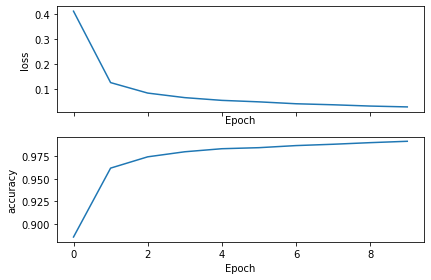

In [29]:
# Training history
_, axes = plt.subplots(2, 1, sharex=True)
# ax1.ylabel('training error')
# ax1.xlabel('epoch')
for ax, k in zip(axes, history.history.keys()):
    ax.set_ylabel(k)
    ax.set_xlabel("Epoch")
    ax.plot(history.history[k], label = k)
# plt.legend(loc='best')
plt.tight_layout()

### 6. Show the confusion matrix and accuracy on the test dataset.

<AxesSubplot:>

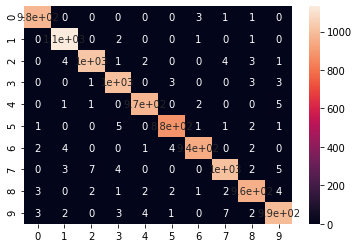

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model(x_test)
y_pred=np.argmax(y_pred, axis=1)

y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [31]:
# the accuracy is found
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is: ", accuracy)

The accuracy of the model is:  0.9873


### 7. Is LeNet better than the fully connected Neural Network trained in the project from lecture 3? Comment on the results

Answer:

## Sub-project 2:

## Use a pretrained model to solve 

In this project you will download the Intel Image Classification dataset (https://www.kaggle.com/puneet6060/intel-image-classification/download).
Find a suitable pretrained Convolutional Neural Network and its weights. Fix the filters and retrain/finetune the top of the network. Show and comment on resuls.

Alternativelly, you can browse Kaggle for some funny datasets like: Dogs vs Cats, Alien vs Predator, Doom vs Animal Crossing, CelebA, etc. Just don't use something easy like MNIST, Fashion-MNIST, etc.

### 1. Download the data

In [32]:
import tensorflow_datasets as tfds
train_ds, validation_ds, test_ds = tfds.load(
  "horses_or_humans",
  # Reserve 10% for validation and 10% for test
  split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
  as_supervised=True,  # Include labels
)

print(f"# training samples: {tf.data.experimental.cardinality(train_ds)}")
print(f"# validation samples: {tf.data.experimental.cardinality(validation_ds)}")
print(f"# test samples: {tf.data.experimental.cardinality(test_ds)}")

# training samples: 411
# validation samples: 103
# test samples: 102


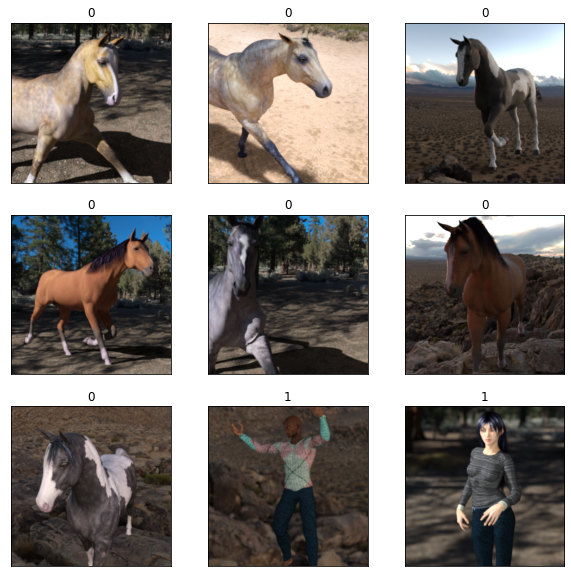

In [33]:
# The data is visualized

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.title(int(label))
  plt.axis('on')
  plt.xticks([])
  plt.yticks([])

### 2. Preprocess the data.

(This might include resizing, augmenting, etc.)




In [34]:
# Resize data
size = (150, 150)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

# Batch data
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

validation_ds

<PrefetchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>

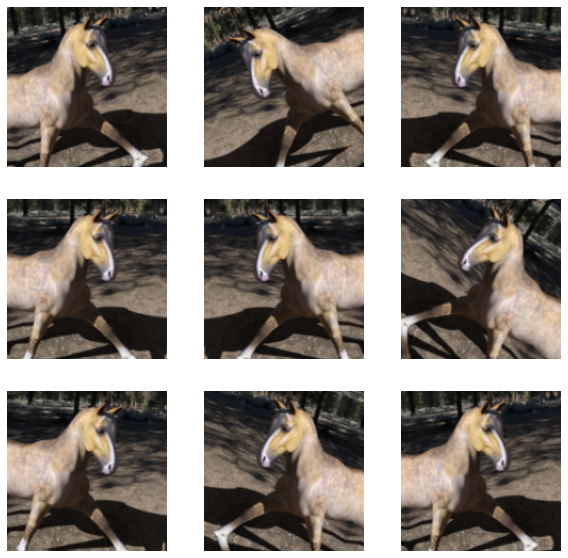

In [35]:
# The data is augmented in order to make it more representative
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  ])

import numpy as np

for images, labels in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(
      tf.expand_dims(first_image, 0), training=True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.axis("off")

### 3. Split the data (train / test / validation) and make mini-batches.

### 4. Download the pretrained architecture and weights.

This part might include some research and understanding of architecures and the type of data they were trained on.

In [36]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
 
  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)
 
model = MyModel()

In [37]:
# "which network should I steal from the internet"

base_model = keras.applications.Xception(
  weights="imagenet",  # Load weights pre-trained on ImageNet.
  input_shape=(150, 150, 3),
  include_top=False, # Do not include the ImageNet classifier at the top.
)  

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
# Apply random data augmentation
# In this case, we will just disturb the already existing data
x = data_augmentation(inputs)

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.)
# The normalization layer does the following:
#            outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

# The base model is not supposed to train, so we will put it into inference mode
#    `training=False`
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

AttributeError: module 'keras' has no attribute 'applications'

### 5. Build the larger model that includes the pre-trained part and prepare it for training.

* Show the model summary so you are sure which components are included and how many (un)trainable parameters you have

In [ ]:
# same as we did in the transfer_learning example
from keras import applications


### 6. Train the trainable part of the model

In [ ]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss=keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

### 7. Show the training plots and confusion matrix

### Finetune the model and show the plots, test data confusion matrix and accuracy.

### 9. Comment on the results. Are the results to your satisfaction? Which phase contributed to the improved performance? What was the most challenging aspect of the exercise? Ideas for improving the model?

Answer: